#IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import calendar
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#UPLOADING OUR DATA TO PANDAS DATAFRAME
This data set which contains transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Source:http://archive.ics.uci.edu/ml/datasets/Online+Retail

In [ ]:
data = pd.read_excel("/content/Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#**ANALYSIS OF OUR DATA**
Let's have a look how does the data looks like :

#NULL VALUES IN EACH COLUMN

In [ ]:
print(data.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#MATRIX OF OUR MISSING DATA

<Axes: >

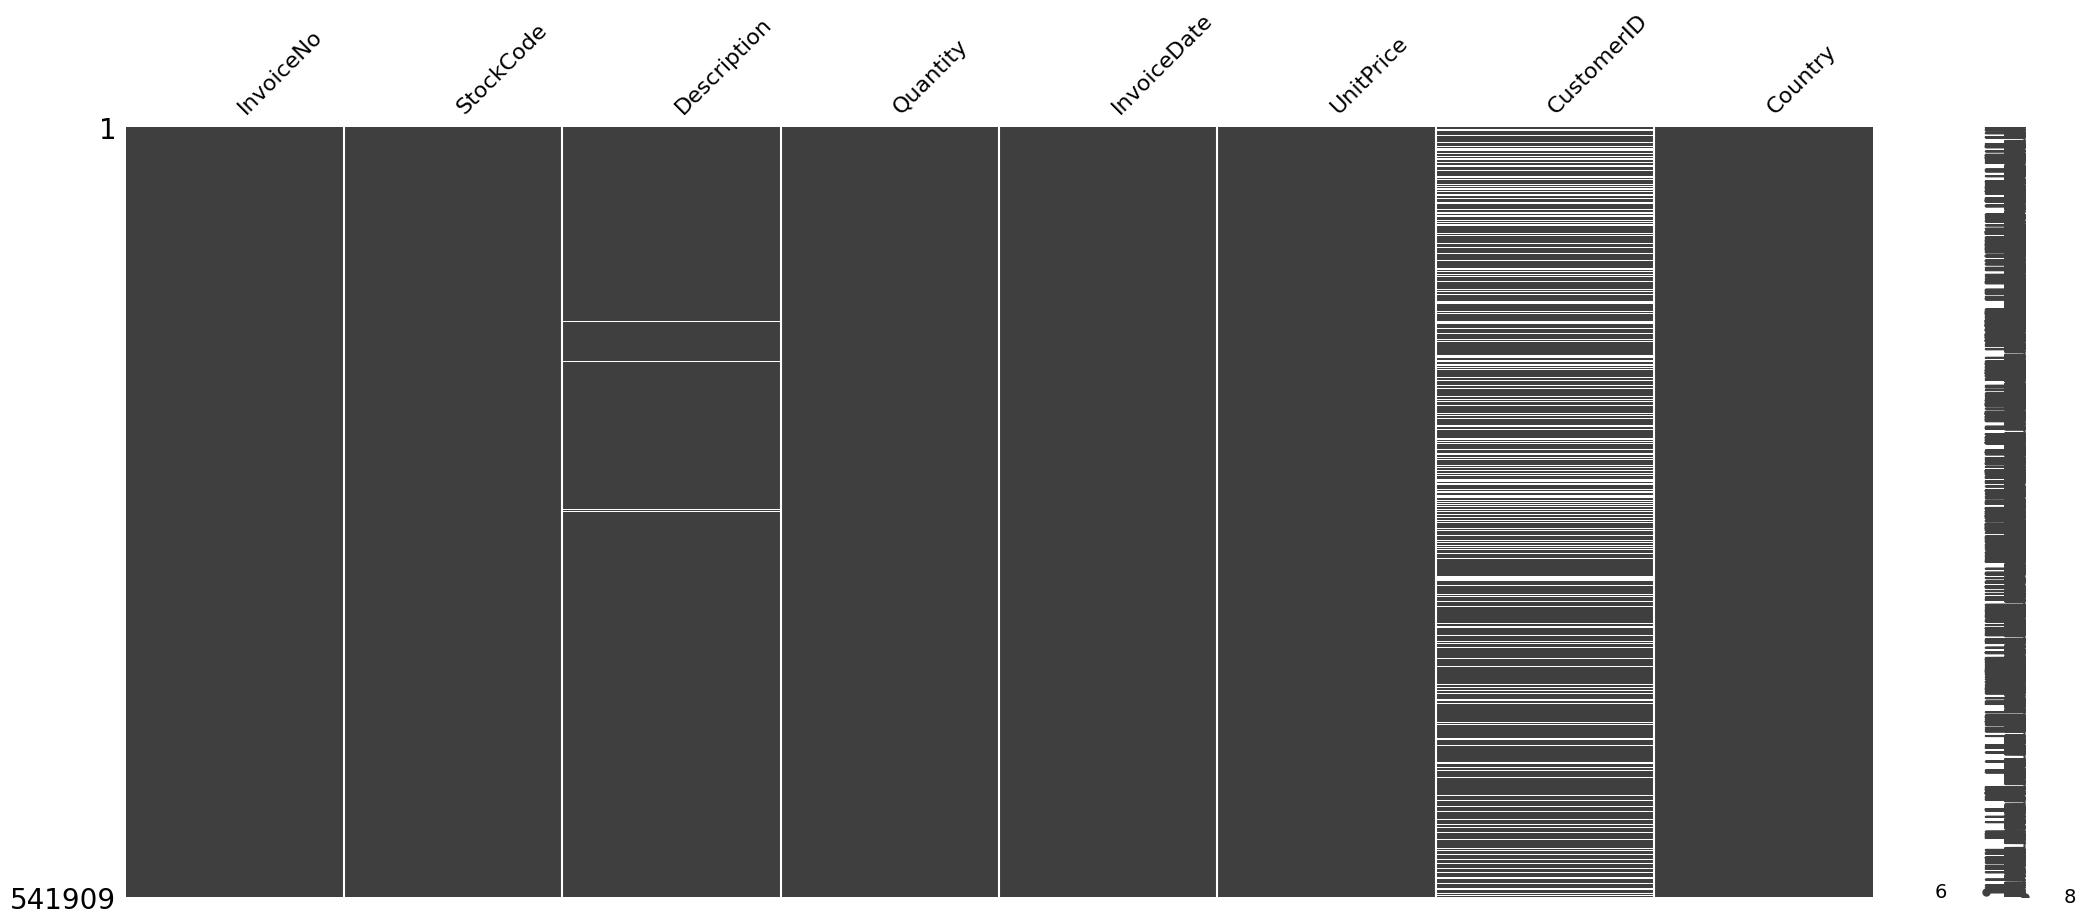

In [ ]:
msno.matrix(data)

#SHAPE OF OUR DATA

In [ ]:
print("The no of rows in the dataset is : ",data.shape[0])
print("The no of columns in the dataset is : ",data.shape[1])
print("The shape of the data : ",data.shape)

The no of rows in the dataset is :  541909
The no of columns in the dataset is :  8
The shape of the data :  (541909, 8)


#FINDING THE INFORMATION OF OUR DATA
Here we will get some information about datatypes of the columns and number of non zero rows in each column. From the information bellow we can conclude that column Description and CustomerID columns contains some missing values. This fact will be examined in further steps.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe(include = 'all')

<ipython-input-122-2258166cf291>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


#PRINTING THE COLUMN NAMES OF OUR DATA

In [ ]:
for col_name in data.columns:
  print(col_name)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


#UNIQUE ELEMENTS IN EACH COLUMN

In [ ]:
print(data['InvoiceNo'].value_counts(sort = True))
print("The Unique number of elements in InvoiceNo column are : ",len(data['InvoiceNo'].value_counts(sort = True)))

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
The Unique number of elements in InvoiceNo column are :  25900


In [ ]:
print(data['StockCode'].value_counts(sort = True))
print("The Unique number of elements in StockCode column are : ",len(data['StockCode'].value_counts(sort = True)))

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
The Unique number of elements in StockCode column are :  4070


In [ ]:
print(data['Description'].value_counts(sort = True))
print("The Unique number of elements in Description column are : ",len(data['Description'].value_counts(sort = True)))

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64
The Unique number of elements in Description column are :  4223


In [ ]:
print(data['Quantity'].value_counts(sort = True))
print("The Unique number of elements in Quantity column are : ",len(data['Quantity'].value_counts(sort = True)))

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64
The Unique number of elements in Quantity column are :  722


In [ ]:
print(data['InvoiceDate'].value_counts(sort = True))
print("The Unique number of elements in InvoiceDate column are : ",len(data['InvoiceDate'].value_counts(sort = True)))

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: InvoiceDate, Length: 23260, dtype: int64
The Unique number of elements in InvoiceDate column are :  23260


In [ ]:
print(data['UnitPrice'].value_counts(sort = True))
print("The Unique number of elements in UnitPrice column are : ",len(data['UnitPrice'].value_counts(sort = True)))

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64
The Unique number of elements in UnitPrice column are :  1630


In [ ]:
print(data['CustomerID'].value_counts(sort = True))
print("The Unique number of elements in CustomerID column are : ",len(data['CustomerID'].value_counts(sort = True)))

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64
The Unique number of elements in CustomerID column are :  4372


In [ ]:
print(data['Country'].value_counts(sort = True))
print("The Unique number of elements in Country column are : ",len(data['Country'].value_counts(sort = True)))

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

#**PREPROCESSING**
We begin preprocessing of the data that helps us in cleaning and in the appplication of Models

In [ ]:
new_data = data.loc[pd.isnull(data.CustomerID) == False]

In [ ]:
new_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: >

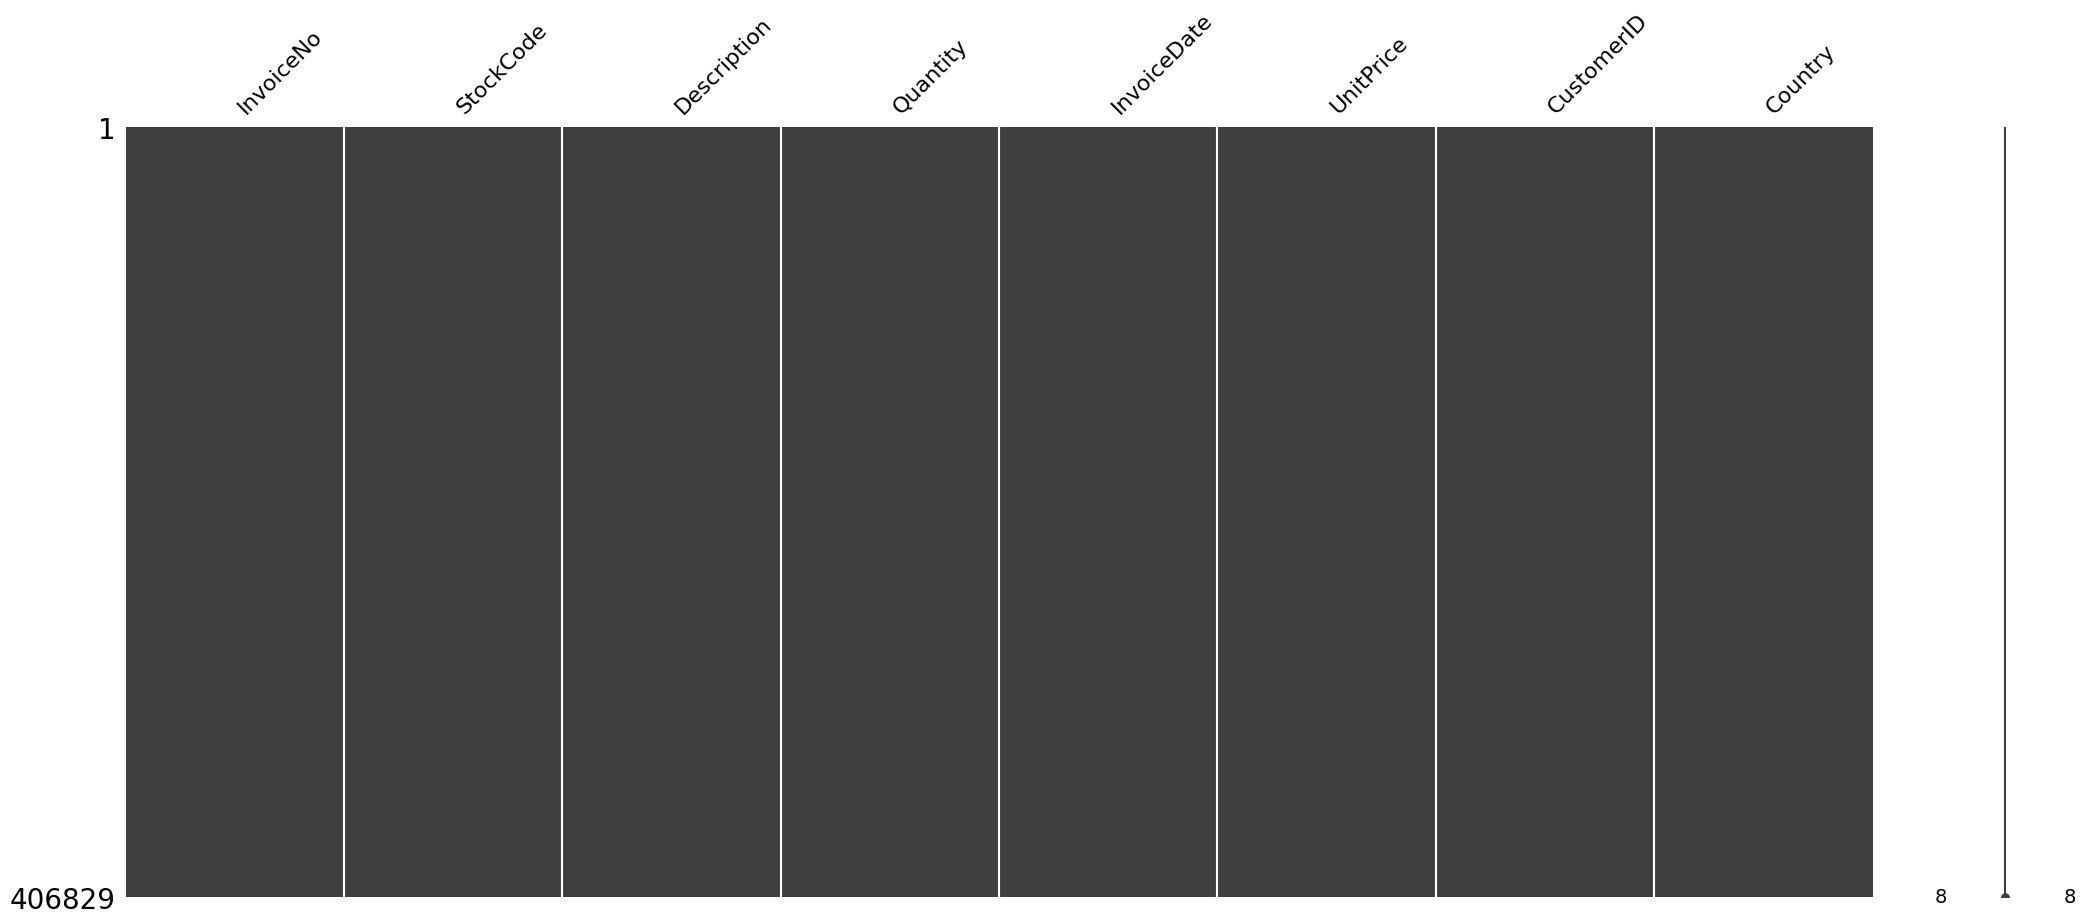

In [ ]:
msno.matrix(new_data)

In [ ]:
negative_quantity = new_data[new_data['Quantity'] < 0]
negative_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
zero_price = new_data[new_data['UnitPrice'] == 0]
zero_price.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [ ]:
canc_trans = new_data[new_data['InvoiceNo'].astype(str).str.contains('C')]
canc_trans

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
canc_trans_neg_quantity = canc_trans[canc_trans['Quantity'] < 0]
canc_trans_neg_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
zer_price = canc_trans[canc_trans['UnitPrice'] == 0]
zer_price.shape

(0, 8)

In [ ]:
final_data = new_data[~(new_data['Quantity'] < 0) & ~(new_data['UnitPrice'] == 0)]
final_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
tempo_data = canc_trans[~(canc_trans['Quantity'] < 0 ) & ~(canc_trans['UnitPrice'] == 0)]
tempo_data.shape

(0, 8)

In [ ]:
final_data.drop_duplicates()
final_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
final_data = final_data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]
final_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
final_data = final_data[~(new_data['InvoiceNo'].astype(str).str.contains('C'))]
final_data.head()

<ipython-input-144-b648b9c0a219>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data = final_data[~(new_data['InvoiceNo'].astype(str).str.contains('C'))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#**FINAL DATA**
The data that is extracted after preproceesing the raw data is used.
Lets again understand how our data looks after preprocessing.

#NULL VALUES IN EACH COLUMN

In [ ]:
print(final_data.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#MATRIX OF OUR MISSING DATA

<Axes: >

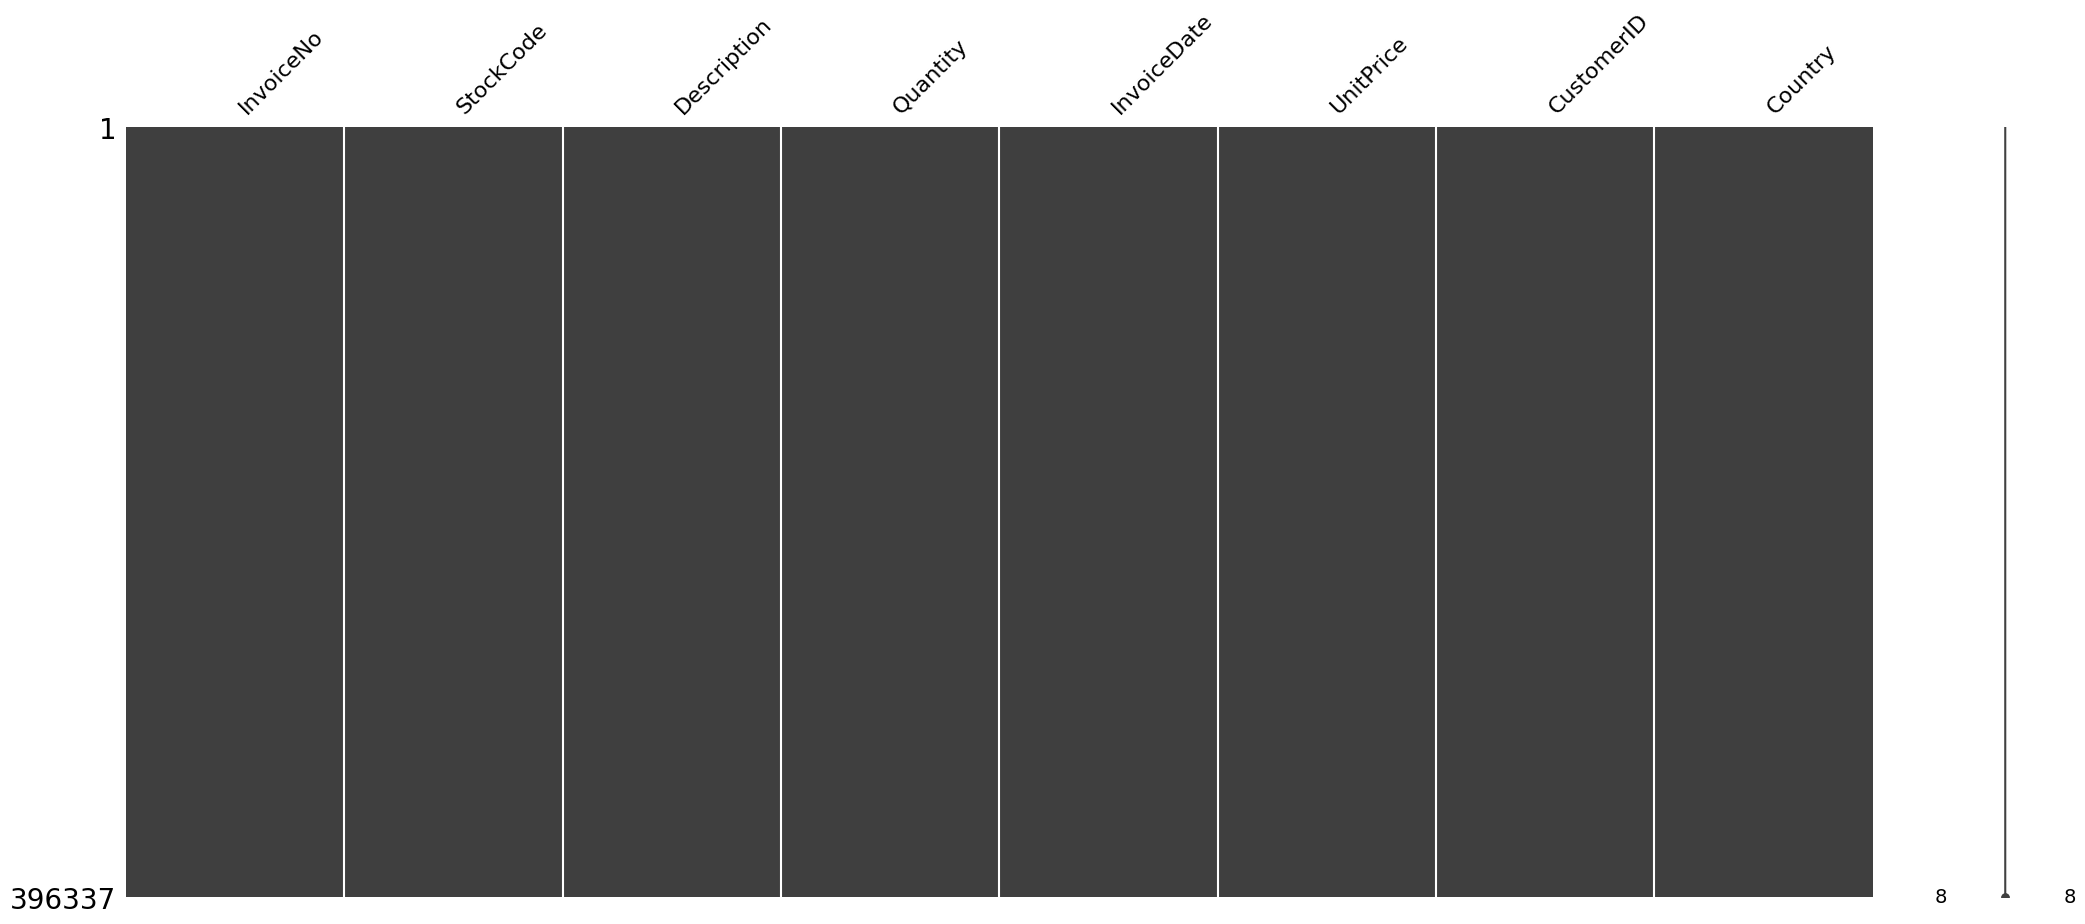

In [ ]:
msno.matrix(final_data)

#SHAPE OF OUR DATA

In [ ]:
print("The no of rows in our dataframe are : ",final_data.shape[0])
print("The no of columns in our dataframe are : ",final_data.shape[1])
print("The shape of our data is : ", final_data.shape)

The no of rows in our dataframe are :  396337
The no of columns in our dataframe are :  8
The shape of our data is :  (396337, 8)


#FINDING THE INFORMATION OF OUR DATA

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396337 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396337 non-null  object        
 1   StockCode    396337 non-null  object        
 2   Description  396337 non-null  object        
 3   Quantity     396337 non-null  int64         
 4   InvoiceDate  396337 non-null  datetime64[ns]
 5   UnitPrice    396337 non-null  float64       
 6   CustomerID   396337 non-null  float64       
 7   Country      396337 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


In [ ]:
final_data.describe(include = 'all')

<ipython-input-149-e990f0d13113>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_data.describe(include = 'all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,396337.0,396337,396337,396337.000000,396337,396337.000000,396337.000000,396337
unique,18402.0,3659,3871,NaN,17166,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,541.0,2035,2028,NaN,541,NaN,NaN,353985
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.012547,NaN,2.868222,15301.689416,NaN
std,NaN,NaN,NaN,179.641245,NaN,4.264663,1709.961948,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.040000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13975.000000,NaN


#UNIQUE ELEMENTS IN EACH COLUMN

In [ ]:
print(final_data['InvoiceNo'].value_counts(sort = True))
print("The Unique number of elements in InvoiceNo column are : ",len(final_data['InvoiceNo'].value_counts(sort = True)))

576339    541
579196    532
580727    528
578270    441
573576    434
         ... 
579107      1
543691      1
538667      1
543675      1
538101      1
Name: InvoiceNo, Length: 18402, dtype: int64
The Unique number of elements in InvoiceNo column are :  18402


In [ ]:
print(final_data['StockCode'].value_counts(sort = True))
print("The Unique number of elements in StockCode column are : ",len(final_data['StockCode'].value_counts(sort = True)))

85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
          ... 
90059D       1
90168        1
90169        1
90202A       1
23843        1
Name: StockCode, Length: 3659, dtype: int64
The Unique number of elements in StockCode column are :  3659


In [ ]:
print(final_data['Description'].value_counts(sort = True))
print("The Unique number of elements in Description column are : ",len(final_data['Description'].value_counts(sort = True)))

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
MULTICOLOUR POLKADOT PLATE               1
PEARL & SHELL 42"NECKL. IVORY            1
PURPLE FRANGIPANI HAIRCLIP               1
ZINC PLANT POT HOLDER                    1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3871, dtype: int64
The Unique number of elements in Description column are :  3871


In [ ]:
print(final_data['Quantity'].value_counts(sort = True))
print("The Unique number of elements in Quantity column are : ",len(final_data['Quantity'].value_counts(sort = True)))

1        72657
12       60016
2        57673
6        37631
4        32067
         ...  
4300         1
608          1
738          1
552          1
80995        1
Name: Quantity, Length: 299, dtype: int64
The Unique number of elements in Quantity column are :  299


In [ ]:
print(final_data['InvoiceDate'].value_counts(sort = True))
print("The Unique number of elements in InvoiceDate column are : ",len(final_data['InvoiceDate'].value_counts(sort = True)))

2011-11-14 15:27:00    541
2011-11-28 15:54:00    532
2011-12-05 17:17:00    528
2011-11-23 13:39:00    442
2011-10-31 14:09:00    434
                      ... 
2011-03-16 12:22:00      1
2011-03-16 12:44:00      1
2011-08-03 15:02:00      1
2011-08-03 12:58:00      1
2011-07-10 10:14:00      1
Name: InvoiceDate, Length: 17166, dtype: int64
The Unique number of elements in InvoiceDate column are :  17166


In [ ]:
print(final_data['UnitPrice'].value_counts(sort = True))
print("The Unique number of elements in UnitPrice column are : ",len(final_data['UnitPrice'].value_counts(sort = True)))

1.25     45820
1.65     36825
2.95     26557
0.85     25949
0.42     21798
         ...  
12.00        1
4.86         1
9.42         1
2.96         1
12.98        1
Name: UnitPrice, Length: 355, dtype: int64
The Unique number of elements in UnitPrice column are :  355


In [ ]:
print(final_data['CustomerID'].value_counts(sort = True))
print("The Unique number of elements in CustomerID column are : ",len(final_data['CustomerID'].value_counts(sort = True)))

17841.0    7838
14911.0    5589
14096.0    5095
12748.0    4580
14606.0    2697
           ... 
13185.0       1
17763.0       1
17925.0       1
14424.0       1
16737.0       1
Name: CustomerID, Length: 4334, dtype: int64
The Unique number of elements in CustomerID column are :  4334


In [ ]:
print(final_data['Country'].value_counts(sort = True))
print("The Unique number of elements in Country column are : ",len(final_data['Country'].value_counts(sort = True)))

United Kingdom          353985
Germany                   8658
France                    8034
EIRE                      7136
Spain                     2422
Netherlands               2322
Belgium                   1935
Switzerland               1810
Portugal                  1425
Australia                 1181
Norway                    1048
Channel Islands            744
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45
Lithuani

#**INTERPRETATIONS**
The things we can understand after cleaning the data.

In [ ]:
print("The percentage of cancelled transactions : ", (canc_trans.shape[0]/len(data['InvoiceNo'])) * 100,"%")

The percentage of cancelled transactions :  1.643264828596683 %


In [ ]:
print("The country with highest transactions is ", final_data['Country'].value_counts(sort = True).index[0],"with", final_data['Country'].value_counts(sort = True)[0],"Transactions")

The country with highest transactions is  United Kingdom with 353985 Transactions


In [ ]:
print("The country with highest no of cancelled transactions is ", canc_trans['Country'].value_counts(sort = True).index[0],"with", canc_trans['Country'].value_counts(sort = True)[0],"Transactions")

The country with highest no of cancelled transactions is  United Kingdom with 7533 Transactions


In [ ]:
data_1 = final_data[['CustomerID','Country']]
count_1 = 0
val_1 = data_1['CustomerID'].value_counts(sort = True).index[0]
for i in data_1['CustomerID']:
  if (i == val_1):
    count_1 = count_1 + 1
print("The Customer with CustomerID ",data_1['CustomerID'].value_counts(sort = True).index[0],"has the highest transactions with the count of ",count_1,"is from ",data_1['Country'].value_counts(sort = True).index[0],"Country")

The Customer with CustomerID  17841.0 has the highest transactions with the count of  7838 is from  United Kingdom Country


In [ ]:
data_2 = final_data[['Description','Country']]
print("The most brought item was ",data_2.value_counts(sort = True).index[0][0],"was from ",data_2.value_counts(sort = True).index[0][1])

The most brought item was  WHITE HANGING HEART T-LIGHT HOLDER was from  United Kingdom


In [ ]:
data_3 = final_data[['CustomerID','UnitPrice']]
val_2 = data_3['UnitPrice'].max()
count_2 = 0
for j in data_3['UnitPrice']:
  count_2 =count_2 + 1
  if (j == val_2):
    print("The most costliest item was bought by the customer with CustomerID",data_3['CustomerID'][count_2:count_2+1].to_string(index = False), "of cost",data_3['UnitPrice'].max())

The most costliest item was bought by the customer with CustomerID 15098.0 of cost 649.5
The most costliest item was bought by the customer with CustomerID 15632.0 of cost 649.5


In [ ]:
data_4 = final_data[['CustomerID','Quantity']]
val_3 = data_4['Quantity'].max()
count_3 = 0
for j in data_4['Quantity']:
  count_3 = count_3 + 1
  if (j == val_3):
    print("The most no of Products where brought by customer with CustomerID",data_4['CustomerID'][count_3:count_3+1].to_string(index = False),"of Quantity",data_4['Quantity'].max())

The most no of Products where brought by customer with CustomerID 17389.0 of Quantity 80995


#HERE WE ARE ADDING NEW COLUMNS FOR BETTER INTERPRETATION

In [ ]:
final_data['Month'] = final_data['InvoiceDate'].dt.month
final_data['Year'] = final_data['InvoiceDate'].dt.year
final_data['WeekDay'] = final_data['InvoiceDate'].dt.day_name()
final_data['Month_Year'] = pd.to_datetime(final_data[['Year', 'Month']].assign(Day=1))
final_data['Hour'] = final_data['InvoiceDate'].dt.hour
final_data['Revenue'] = final_data['UnitPrice'] * final_data['Quantity']

In [ ]:
convert_month = lambda month_number: calendar.month_abbr[month_number]
final_data['Month'] = final_data['Month'].apply(convert_month)

#UNIQUE ELEMENTS IN THE NEW COLUMNS

In [ ]:
print(final_data['Month'].value_counts(sort = True))
print("The Unique number of elements in Month column are : ",len(final_data['Month'].value_counts(sort = True)))

Nov    64301
Oct    49367
Dec    43298
Sep    39869
May    28207
Jun    27079
Mar    27055
Aug    26900
Jul    26719
Apr    22554
Jan    21137
Feb    19851
Name: Month, dtype: int64
The Unique number of elements in Month column are :  12


In [ ]:
print(final_data['Year'].value_counts(sort = True))
print("The Unique number of elements in Year column are : ",len(final_data['Year'].value_counts(sort = True)))

2011    370281
2010     26056
Name: Year, dtype: int64
The Unique number of elements in Year column are :  2


In [ ]:
print(final_data['WeekDay'].value_counts(sort = True))
print("The Unique number of elements in WeekDay column are : ",len(final_data['WeekDay'].value_counts(sort = True)))

Thursday     79696
Wednesday    68614
Tuesday      66220
Monday       64620
Sunday       62645
Friday       54542
Name: WeekDay, dtype: int64
The Unique number of elements in WeekDay column are :  6


In [ ]:
print(final_data['Month_Year'].value_counts(sort = True))
print("The Unique number of elements in Month_Year column are : ",len(final_data['Month_Year'].value_counts(sort = True)))

2011-11-01    64301
2011-10-01    49367
2011-09-01    39869
2011-05-01    28207
2011-06-01    27079
2011-03-01    27055
2011-08-01    26900
2011-07-01    26719
2010-12-01    26056
2011-04-01    22554
2011-01-01    21137
2011-02-01    19851
2011-12-01    17242
Name: Month_Year, dtype: int64
The Unique number of elements in Month_Year column are :  13


In [ ]:
print(final_data['Hour'].value_counts(sort = True))
print("The Unique number of elements in Hour column are : ",len(final_data['Hour'].value_counts(sort = True)))

12    71843
13    63807
14    53919
11    48928
15    45194
10    37777
16    24000
9     21804
17    13027
8      8627
19     3317
18     2917
20      801
7       375
6         1
Name: Hour, dtype: int64
The Unique number of elements in Hour column are :  15


In [ ]:
print(final_data['Revenue'].value_counts(sort = True))
print("The Unique number of elements in Revenue column are : ",len(final_data['Revenue'].value_counts(sort = True)))

15.00      20019
17.70       9174
16.50       8490
10.20       8028
19.80       7625
           ...  
27.60          1
24.38          1
1305.60        1
277.92         1
66.36          1
Name: Revenue, Length: 2855, dtype: int64
The Unique number of elements in Revenue column are :  2855


#PRINTING THE NEW COLUMNS

In [ ]:
for col_name in final_data.columns:
  print(col_name)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
Month
Year
WeekDay
Month_Year
Hour
Revenue


#**VISUALIZATION OF OUR DATA**
This is visualization or visual representation of our data that helps in even better understanding

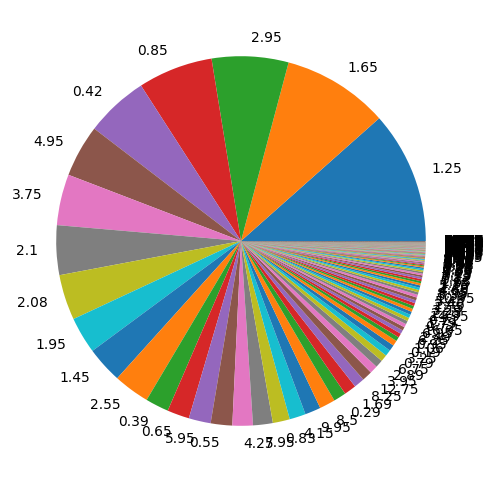

In [ ]:
X_1 = final_data['UnitPrice'].value_counts(sort = True).index
Y_1 = final_data['UnitPrice'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_1 = plt.pie(Y_1, labels = X_1)
plt.show()

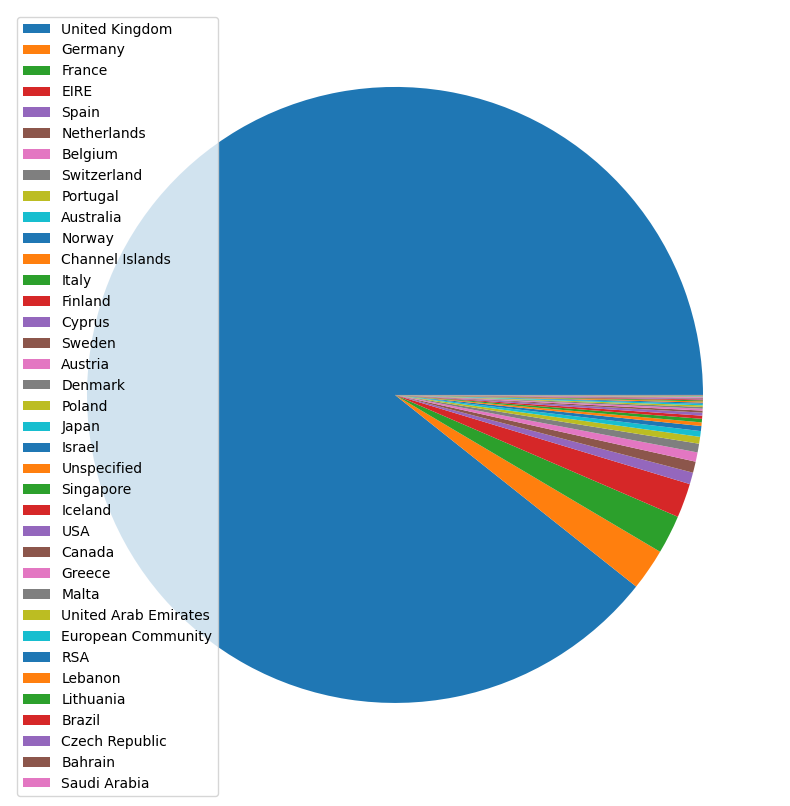

In [ ]:
X_2 = final_data['Country'].value_counts(sort = True).index
Y_2 = final_data['Country'].value_counts(sort = True)
plt.figure(figsize=(10,10))
fig_2 = plt.pie(Y_2)
plt.legend(X_2)
plt.show()

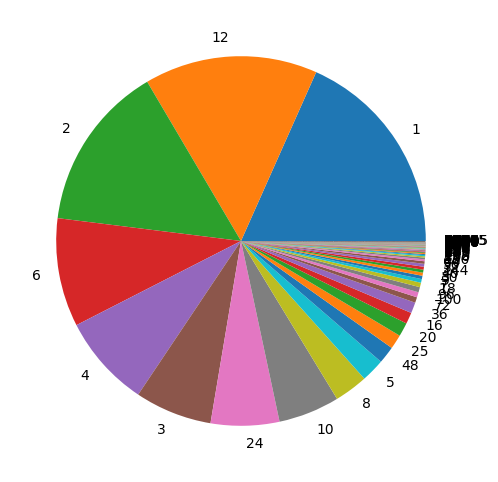

In [ ]:
X_3 = final_data['Quantity'].value_counts(sort = True).index
Y_3 = final_data['Quantity'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_3 = plt.pie(Y_3, labels = X_3)
plt.show()

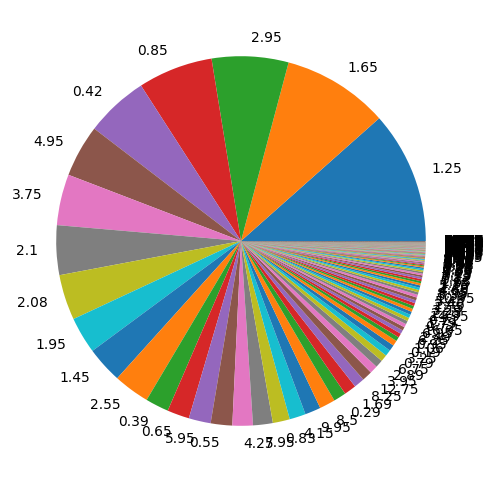

In [ ]:
X_4 = final_data['UnitPrice'].value_counts(sort = True).index
Y_4 = final_data['UnitPrice'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_4 = plt.pie(Y_4, labels = X_4)
plt.show()

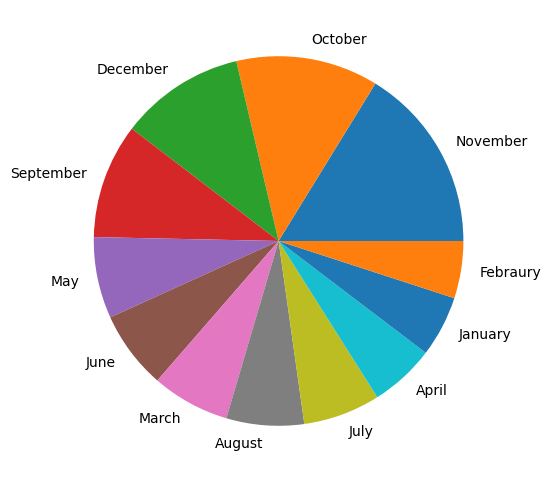

In [ ]:
X_5 = ['November','October','December','September','May','June','March','August','July','April','January','Febraury']
Y_5 = final_data['Month'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_5 = plt.pie(Y_5, labels = X_5)
plt.show()

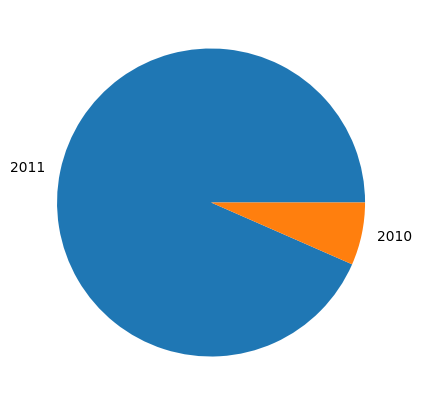

In [ ]:
X_6 = final_data['Year'].value_counts(sort = True).index
Y_6 = final_data['Year'].value_counts(sort = True)
plt.figure(figsize=(5,5))
fig_6 = plt.pie(Y_6,labels = X_6)
plt.show()

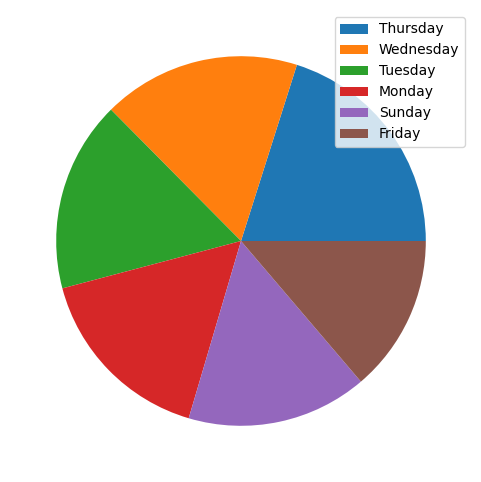

In [ ]:
X_7 = final_data['WeekDay'].value_counts(sort = True).index
Y_7 = final_data['WeekDay'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_7 = plt.pie(Y_7)
plt.legend(X_7)
plt.show()

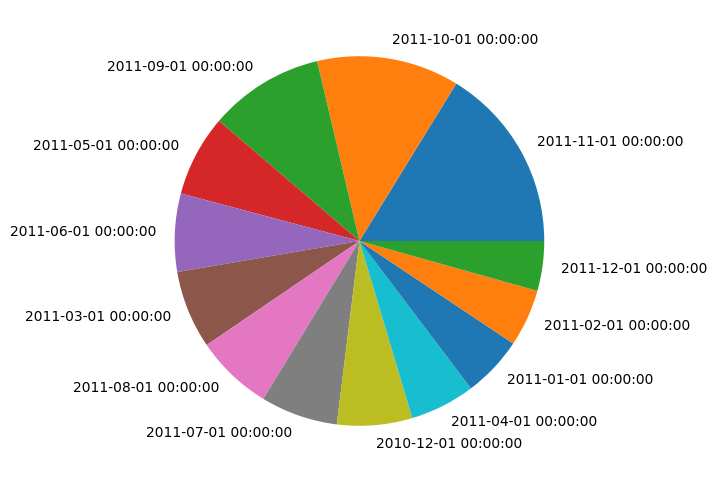

In [ ]:
X_8 = final_data['Month_Year'].value_counts(sort = True).index
Y_8 = final_data['Month_Year'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_8 = plt.pie(Y_8,labels = X_8)
plt.show()

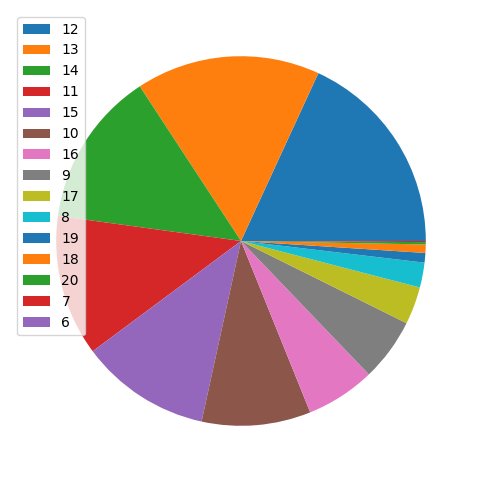

In [ ]:
X_9 = final_data['Hour'].value_counts(sort = True).index
Y_9 = final_data['Hour'].value_counts(sort = True)
plt.figure(figsize=(6,6))
fig_9 = plt.pie(Y_9)
plt.legend(X_9)
plt.show()

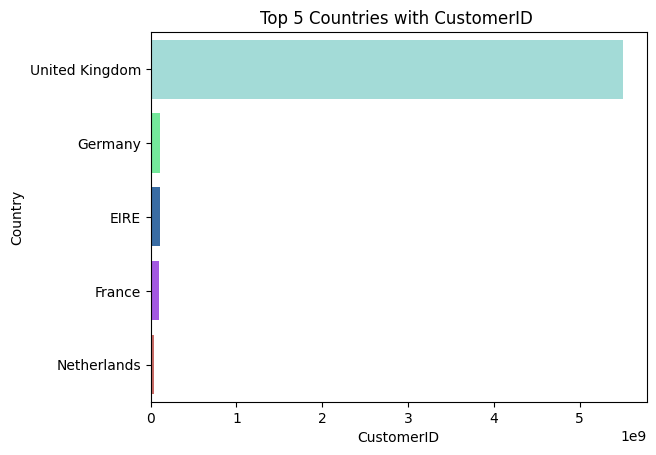

In [ ]:
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_1.shape[0])]

CustomerID_per_Country = data_1.groupby('Country')['CustomerID'].sum().reset_index().sort_values('CustomerID',ascending=False)
z_1 = sns.barplot(data=CustomerID_per_Country.head(5), x='CustomerID',y='Country',palette = colors)
plt.title("Top 5 Countries with CustomerID ")
plt.show()

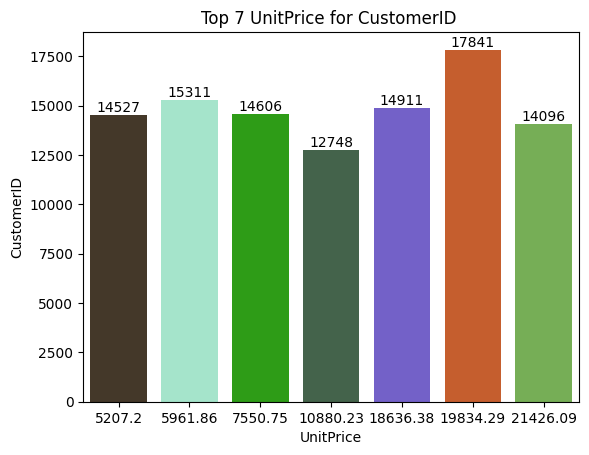

In [ ]:
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_3.shape[0])]

UnitPrice_per_CustomerID = data_3.groupby('CustomerID')['UnitPrice'].sum().reset_index().sort_values('UnitPrice',ascending=False)
z_2 = sns.barplot(data=UnitPrice_per_CustomerID.head(7), x='UnitPrice',y='CustomerID',palette = colors)
z_2.bar_label(z_2.containers[0])
plt.title("Top 7 UnitPrice for CustomerID ")
plt.show()

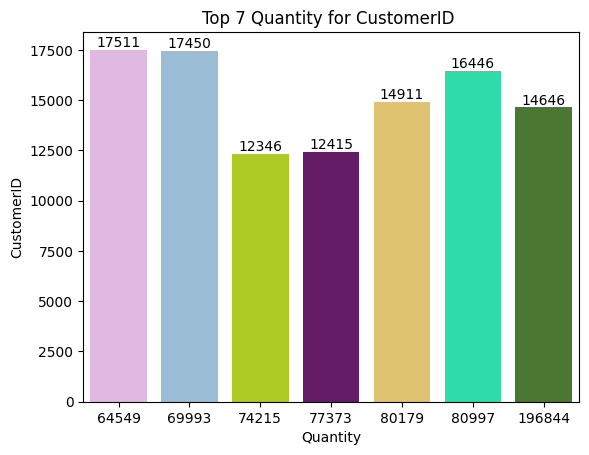

In [ ]:
data_4 = final_data[['CustomerID','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_4.shape[0])]

UnitPrice_per_CustomerID = data_4.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_3 = sns.barplot(data=UnitPrice_per_CustomerID.head(7), x='Quantity',y='CustomerID',palette = colors)
z_3.bar_label(z_3.containers[0])
plt.title("Top 7 Quantity for CustomerID ")
plt.show()

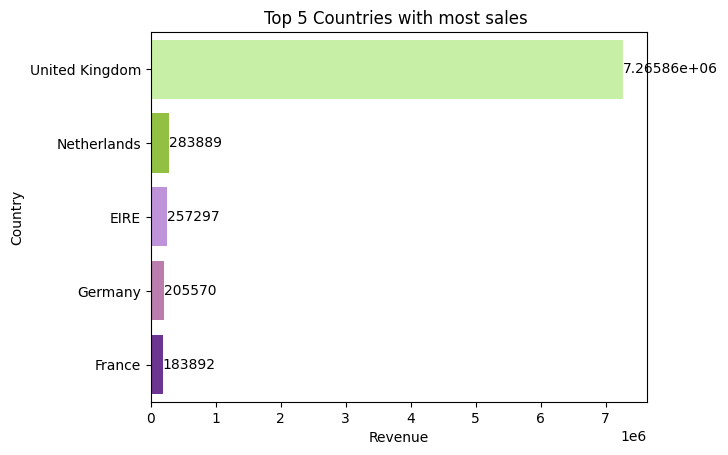

In [ ]:
data_5 = final_data[['Country','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_5.shape[0])]

Revenue_per_Country = data_5.groupby('Country')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_4 = sns.barplot(data=Revenue_per_Country.head(5), x='Revenue',y='Country',palette = colors)
z_4.bar_label(z_4.containers[0])
plt.title("Top 5 Countries with most sales ")
plt.show()

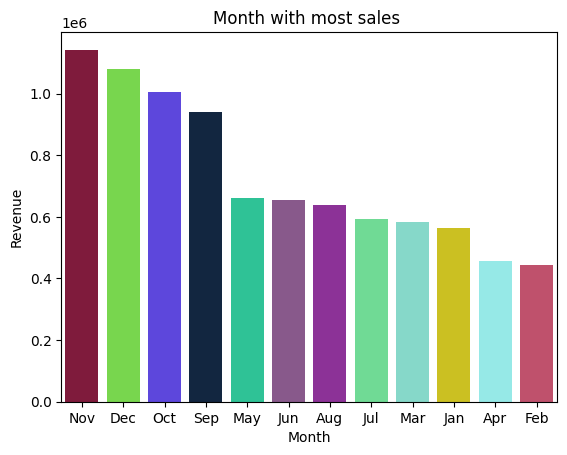

In [ ]:
data_6 = final_data[['Month','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_6.shape[0])]

Revenue_per_Month = data_6.groupby('Month')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_5 = sns.barplot(data=Revenue_per_Month, x='Month',y='Revenue',palette = colors)
plt.title("Month with most sales ")
plt.show()

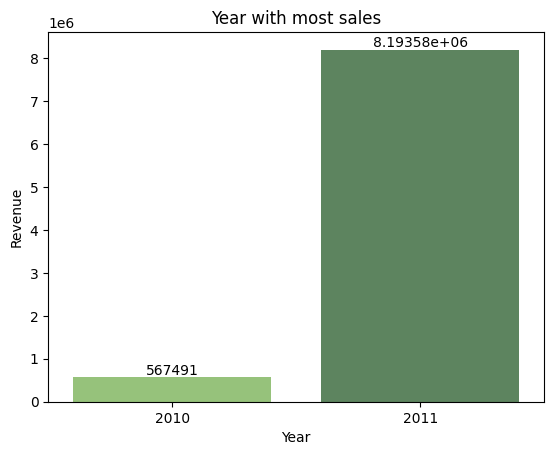

In [ ]:
data_7 = final_data[['Year','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_7.shape[0])]

Revenue_per_Year =data_7.groupby('Year')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_6 = sns.barplot(data=Revenue_per_Year, x='Year',y='Revenue',palette = colors)
z_6.bar_label(z_6.containers[0])
plt.title("Year with most sales")
plt.show()

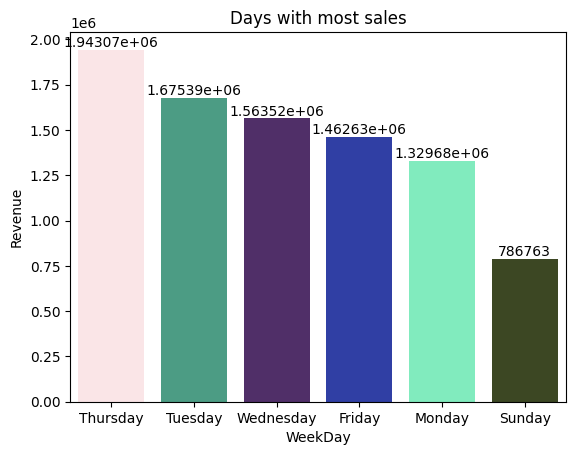

In [ ]:
data_8 = final_data[['WeekDay','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_8.shape[0])]

Revenue_per_WeekDay = data_8.groupby('WeekDay')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_7 = sns.barplot(data=Revenue_per_WeekDay, x='WeekDay',y='Revenue',palette = colors)
z_7.bar_label(z_7.containers[0])
plt.title("Days with most sales")
plt.show()

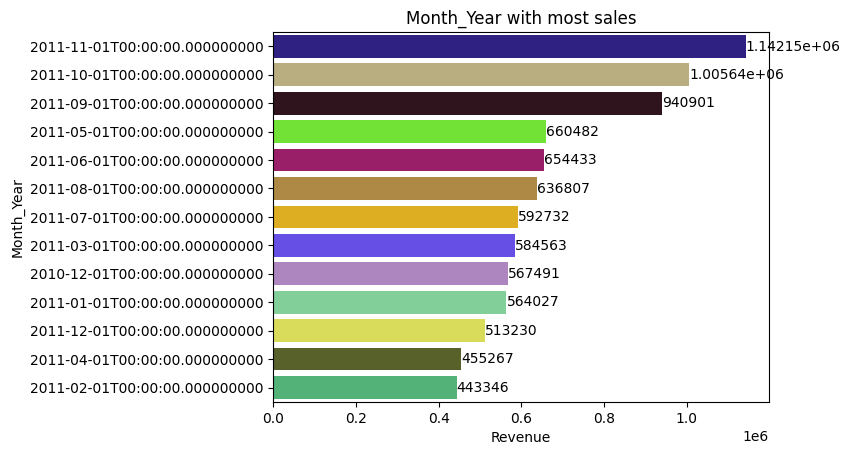

In [ ]:
data_9 = final_data[['Month_Year','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_9.shape[0])]

Revenue_per_Month_Year = data_9.groupby('Month_Year')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_8 = sns.barplot(data=Revenue_per_Month_Year, x='Revenue',y='Month_Year',palette = colors)
z_8.bar_label(z_8.containers[0])
plt.title("Month_Year with most sales")
plt.show()

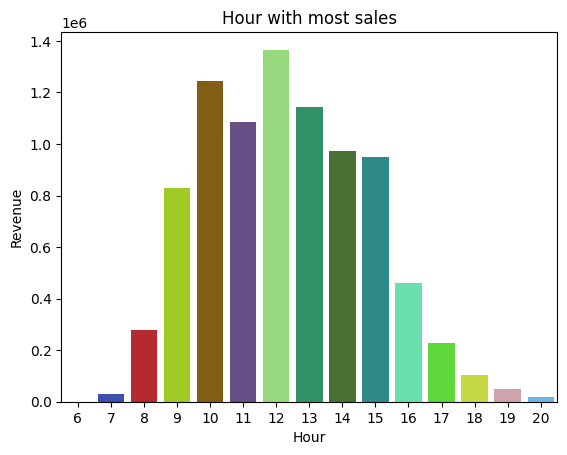

In [ ]:
data_10 = final_data[['Hour','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_10.shape[0])]

Revenue_per_Hour = data_10.groupby('Hour')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_9 = sns.barplot(data=Revenue_per_Hour, x='Hour',y='Revenue',palette = colors)
plt.title("Hour with most sales")
plt.show()

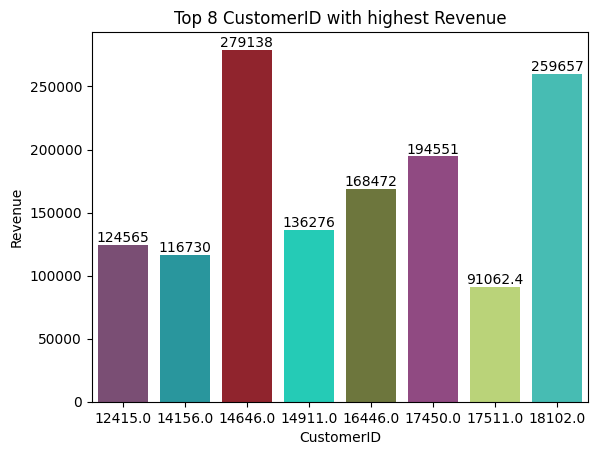

In [ ]:
data_11 = final_data[['CustomerID','Revenue']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_11.shape[0])]

Revenue_per_CustomerID = data_11.groupby('CustomerID')['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
z_10 = sns.barplot(data=Revenue_per_CustomerID.head(8), x='CustomerID',y='Revenue',palette = colors)
z_10.bar_label(z_10.containers[0])
plt.title("Top 8 CustomerID with highest Revenue")
plt.show()

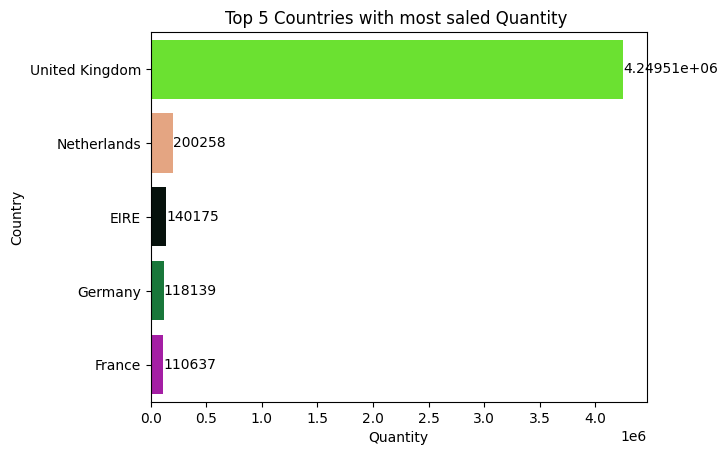

In [ ]:
data_12 = final_data[['Country','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_12.shape[0])]

Quantity_per_Country = data_12.groupby('Country')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_11 = sns.barplot(data=Quantity_per_Country.head(5), x='Quantity',y='Country',palette = colors)
z_11.bar_label(z_11.containers[0])
plt.title("Top 5 Countries with most saled Quantity ")
plt.show()

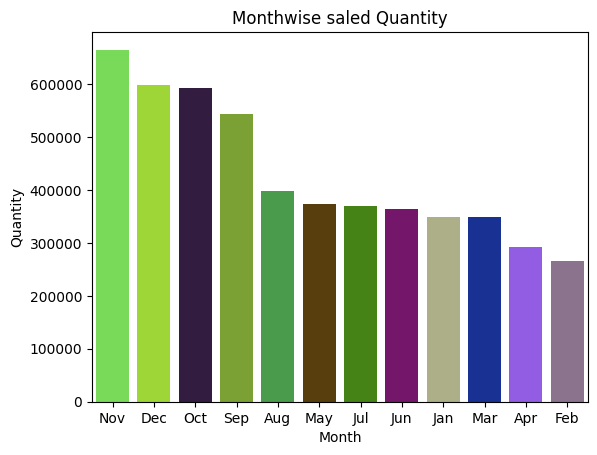

In [ ]:
data_13 = final_data[['Month','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_13.shape[0])]

Quantity_per_Month = data_13.groupby('Month')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_12 = sns.barplot(data=Quantity_per_Month, y='Quantity',x='Month',palette = colors)
plt.title("Monthwise saled Quantity")
plt.show()

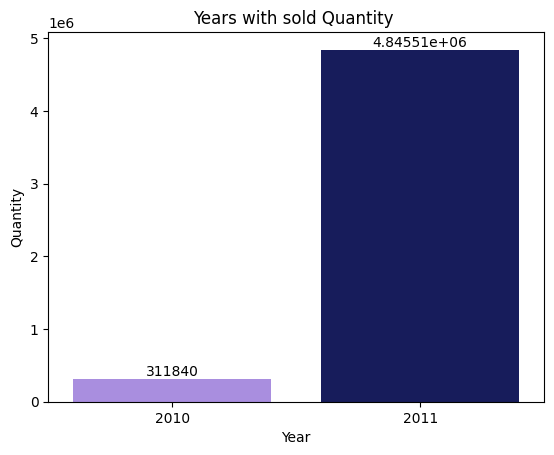

In [ ]:
data_14 = final_data[['Year','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_14.shape[0])]

Quantity_per_Year = data_14.groupby('Year')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_13 = sns.barplot(data=Quantity_per_Year, x='Year',y='Quantity',palette = colors)
z_13.bar_label(z_13.containers[0])
plt.title("Years with sold Quantity ")
plt.show()

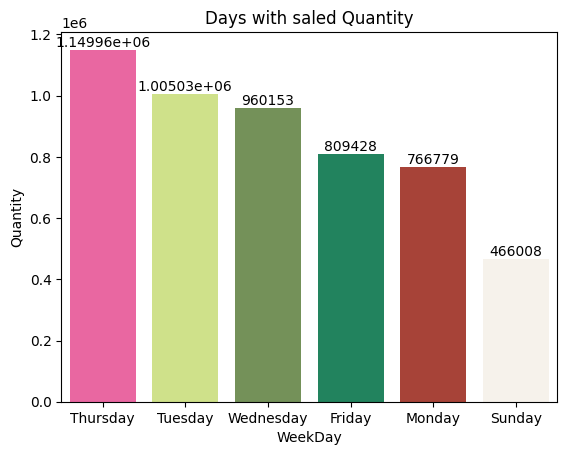

In [ ]:
data_15 = final_data[['WeekDay','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_15.shape[0])]

Quantity_per_Days = data_15.groupby('WeekDay')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_14 = sns.barplot(data=Quantity_per_Days, x='WeekDay',y='Quantity',palette = colors)
z_14.bar_label(z_14.containers[0])
plt.title("Days with saled Quantity")
plt.show()

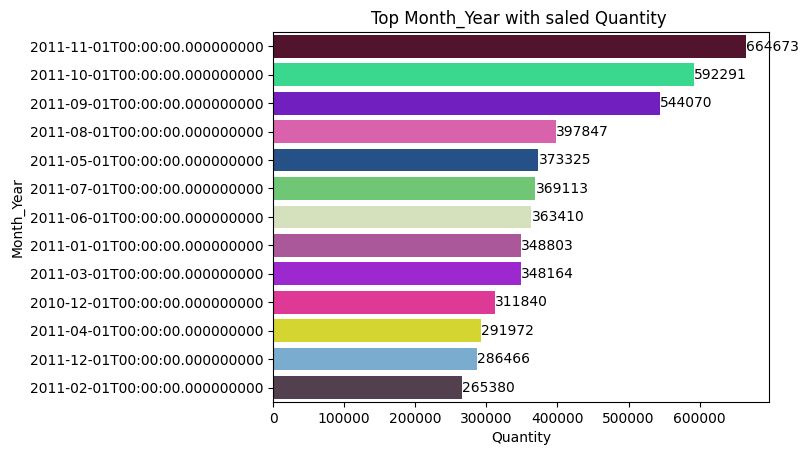

In [ ]:
data_16 = final_data[['Month_Year','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_16.shape[0])]

Quantity_per_Month_Year = data_16.groupby('Month_Year')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_15 = sns.barplot(data=Quantity_per_Month_Year, x='Quantity',y='Month_Year',palette = colors)
z_15.bar_label(z_15.containers[0])
plt.title("Top Month_Year with saled Quantity ")
plt.show()

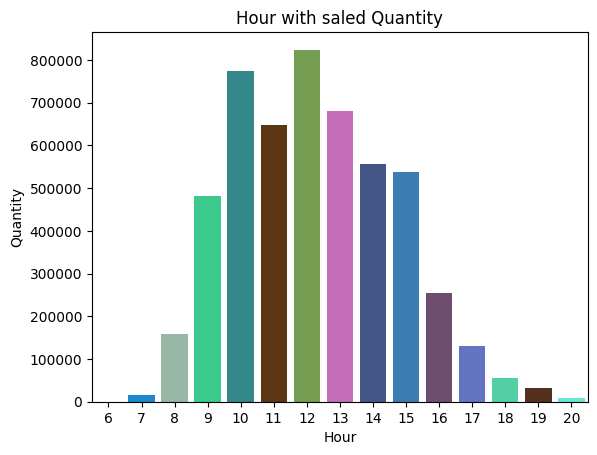

In [ ]:
data_17 = final_data[['Hour','Quantity']]
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (data_17.shape[0])]

Quantity_per_Hour = data_17.groupby('Hour')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
z_16 = sns.barplot(data=Quantity_per_Hour, x='Hour',y='Quantity',palette = colors)
plt.title("Hour with saled Quantity")
plt.show()

#CORRELATION MATRIX OF OUR DATA

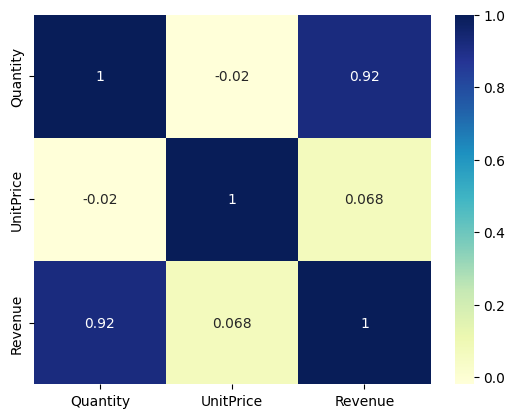

In [ ]:
corr_data = final_data[['Quantity','UnitPrice','Revenue']]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu", annot = True)
plt.show()

#**CUSTOMER SEGMENTATION**
Here we basically form three columns namely recency,frequency,monetary for RFM analysis

Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

In [ ]:
reference_date = dt.datetime(2011, 12, 11)
rfm = final_data.groupby("CustomerID").agg({"InvoiceDate": lambda date: (reference_date - date.max()).days,
                                     "InvoiceNo": lambda num: num.nunique(),
                                      "Revenue": lambda price: price.sum()})
rfm.head()

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1437.24
12349.0,19,1,1457.55
12350.0,311,1,294.40


In [ ]:
rfm.columns = ['Recency', 'Frequency', "Monetary"]
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,311,1,294.40


In [ ]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,3,7,4310.00,5,5,5
2,12348.0,76,4,1437.24,2,4,4
3,12349.0,19,1,1457.55,4,1,4
4,12350.0,311,1,294.40,1,1,2


In [ ]:
rfm["RFM_Score"] = (rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str))
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,3,7,4310.00,5,5,5,555
2,12348.0,76,4,1437.24,2,4,4,244
3,12349.0,19,1,1457.55,4,1,4,414
4,12350.0,311,1,294.40,1,1,2,112


In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Inactive_Customers',
    r'[1-2][3-4]': 'Vulnerable_Customers',
    r'[1-2]5': 'Priority_Customers',
    r'3[1-2]': 'About_to_become_Inactive_Customers',
    r'33': 'Essential_Customers',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising_Customers',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potentially_Loyal_Customers',
    r'5[4-5]': 'Important_Customers'}

rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,3,7,4310.00,5,5,5,555
2,12348.0,76,4,1437.24,2,4,4,244
3,12349.0,19,1,1457.55,4,1,4,414
4,12350.0,311,1,294.40,1,1,2,112


In [ ]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Inactive_Customers
1,12347.0,3,7,4310.00,5,5,5,555,Important_Customers
2,12348.0,76,4,1437.24,2,4,4,244,Vulnerable_Customers
3,12349.0,19,1,1457.55,4,1,4,414,Promising_Customers
4,12350.0,311,1,294.40,1,1,2,112,Inactive_Customers


#VISUALIZATION OF RFM TABLE

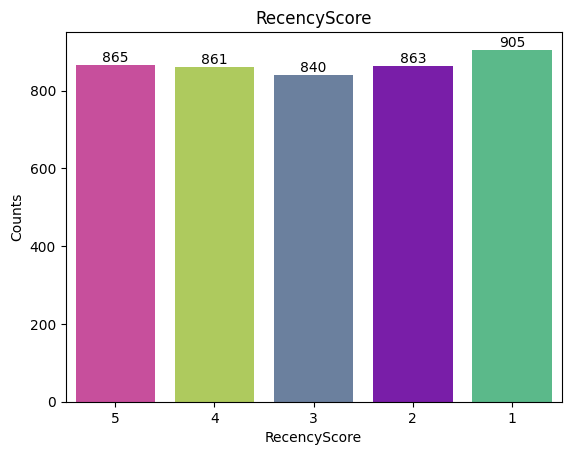

In [ ]:
x_1 = rfm['RecencyScore'].value_counts(sort = True).index
y_1 = rfm['RecencyScore'].value_counts(sort = True)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (0,len(x_1))]

figure_1 = sns.barplot(data = rfm, x = rfm['RecencyScore'].unique(), y = y_1.values,palette = colors)
figure_1.bar_label(figure_1.containers[0])
plt.title('RecencyScore')
plt.xlabel('RecencyScore')
plt.ylabel('Counts')
plt.show()

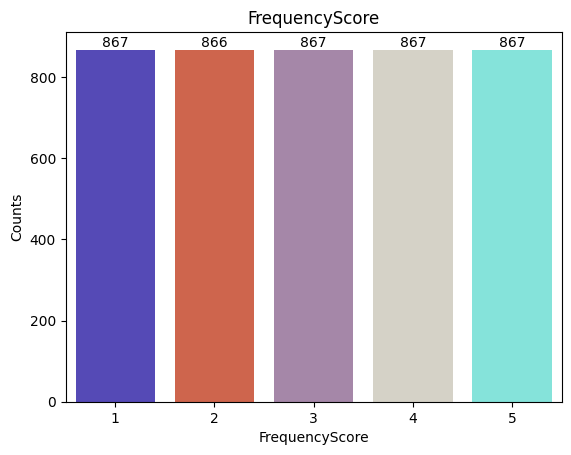

In [ ]:
x_2 = rfm['FrequencyScore'].value_counts(sort = True).index
y_2 = rfm['FrequencyScore'].value_counts(sort = True)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (0,len(x_2))]
figure_2 = sns.barplot(data = rfm, x = rfm['FrequencyScore'].unique(), y = y_2.values,palette = colors)
figure_2.bar_label(figure_2.containers[0])
plt.title('FrequencyScore')
plt.xlabel('FrequencyScore')
plt.ylabel('Counts')
plt.show()

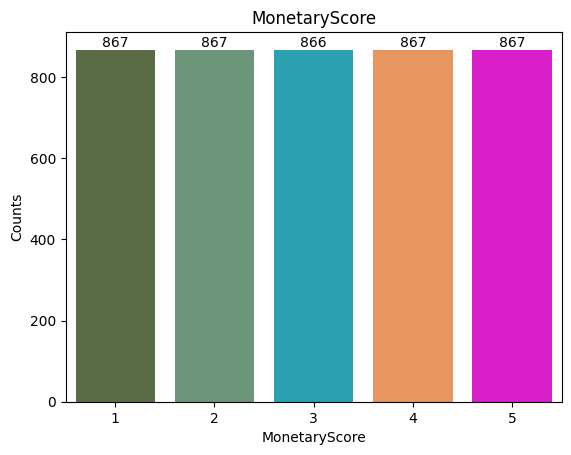

In [ ]:
x_3 = rfm['MonetaryScore'].value_counts(sort = True).index
y_3 = rfm['MonetaryScore'].value_counts(sort = True)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (0,len(x_3))]
figure_3 = sns.barplot(data = rfm, x = rfm['MonetaryScore'].unique(), y = y_3.values,palette = colors)
figure_3.bar_label(figure_3.containers[0])
plt.xlabel('MonetaryScore')
plt.ylabel('Counts')
plt.title('MonetaryScore')
plt.show()

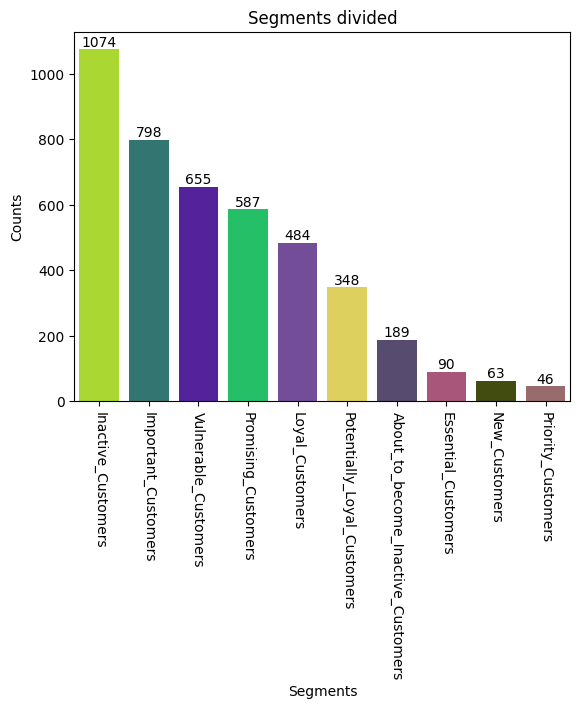

In [ ]:
x_4 = rfm['Segment'].value_counts(sort = True).index
y_4 = rfm['Segment'].value_counts(sort = True)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (0,len(x_4))]
figure_4 = sns.barplot(data = rfm, x = rfm['Segment'].unique(), y = y_4.values,palette = colors)
figure_4.bar_label(figure_4.containers[0])
plt.xticks(rotation = 270)
plt.xlabel('Segments')
plt.ylabel('Counts')
plt.title('Segments divided')
plt.show()

#CORRELATION OF RFM TABLE

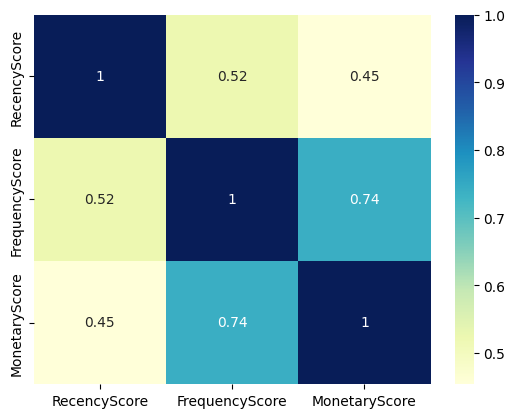

In [ ]:
corr_data_1 = rfm[['RecencyScore','FrequencyScore','MonetaryScore']].astype(int)
mat_1 = corr_data_1.corr()
sns.heatmap(mat_1,cmap="YlGnBu", annot=True)
plt.show()

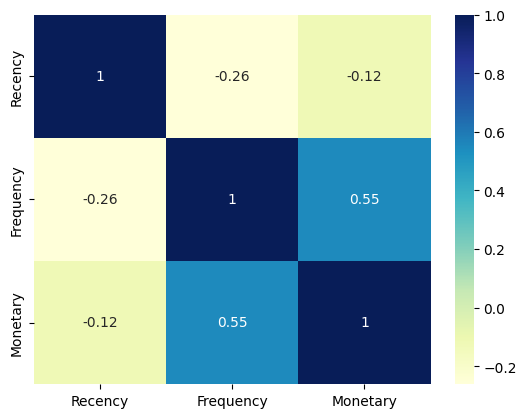

In [ ]:
corr_data_2 = rfm[['Recency','Frequency','Monetary']].astype(int)
mat_2 = corr_data_2.corr()
sns.heatmap(mat_2,cmap="YlGnBu", annot=True)
plt.show()

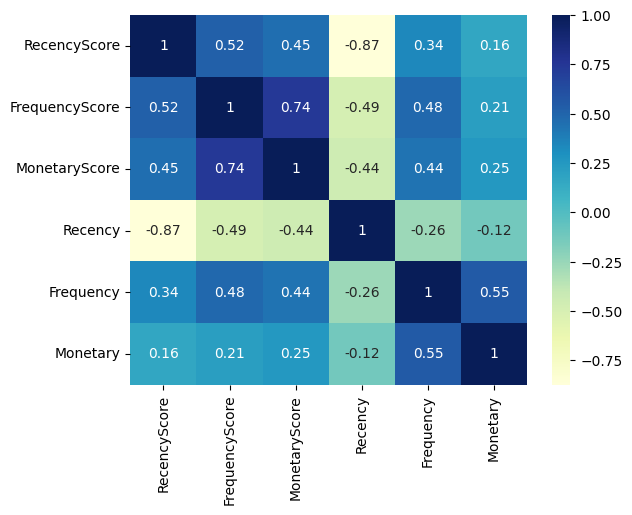

In [ ]:
corr_data_3 = rfm[['RecencyScore','FrequencyScore','MonetaryScore','Recency','Frequency','Monetary']].astype(int)
mat_3 = corr_data_3.corr()
sns.heatmap(mat_3,cmap="YlGnBu", annot=True)
plt.show()

#INTERPRETATIONS FROM RFM ANALYSIS

In [ ]:
print("The percentage of customer who are Rank_1 in RecencyScore are : ",(y_1.values[0]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_2 in RecencyScore are : ",(y_1.values[1]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_3 in RecencyScore are : ",(y_1.values[2]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_4 in RecencyScore are : ",(y_1.values[3]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_5 in RecencyScore are : ",(y_1.values[4]/rfm.shape[0]) * 100,"%")

The percentage of customer who are Rank_1 in RecencyScore are :  20.88140286109829 %
The percentage of customer who are Rank_2 in RecencyScore are :  19.958467928011075 %
The percentage of customer who are Rank_3 in RecencyScore are :  19.912321181356717 %
The percentage of customer who are Rank_4 in RecencyScore are :  19.86617443470235 %
The percentage of customer who are Rank_5 in RecencyScore are :  19.381633594831566 %


In [ ]:
print("The percentage of customer who are Rank_1 in FrequencyScore are : ",(y_2.values[0]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_2 in FrequencyScore are : ",(y_2.values[1]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_3 in FrequencyScore are : ",(y_2.values[2]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_4 in FrequencyScore are : ",(y_2.values[3]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_5 in FrequencyScore are : ",(y_2.values[4]/rfm.shape[0]) * 100,"%")

The percentage of customer who are Rank_1 in FrequencyScore are :  20.004614674665437 %
The percentage of customer who are Rank_2 in FrequencyScore are :  20.004614674665437 %
The percentage of customer who are Rank_3 in FrequencyScore are :  20.004614674665437 %
The percentage of customer who are Rank_4 in FrequencyScore are :  20.004614674665437 %
The percentage of customer who are Rank_5 in FrequencyScore are :  19.981541301338257 %


In [ ]:
print("The percentage of customer who are Rank_1 in MonetaryScore are : ",(y_3.values[0]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_2 in MonetaryScore are : ",(y_3.values[1]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_3 in MonetaryScore are : ",(y_3.values[2]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_4 in MonetaryScore are : ",(y_3.values[3]/rfm.shape[0]) * 100,"%")
print("The percentage of customer who are Rank_5 in MonetaryScore are : ",(y_3.values[4]/rfm.shape[0]) * 100,"%")

The percentage of customer who are Rank_1 in MonetaryScore are :  20.004614674665437 %
The percentage of customer who are Rank_2 in MonetaryScore are :  20.004614674665437 %
The percentage of customer who are Rank_3 in MonetaryScore are :  20.004614674665437 %
The percentage of customer who are Rank_4 in MonetaryScore are :  20.004614674665437 %
The percentage of customer who are Rank_5 in MonetaryScore are :  19.981541301338257 %


In [ ]:
print("The percentage of Inactive_Customers are : ",(y_4.values[0]/rfm.shape[0]) * 100,"%")
print("The percentage of Important_Customers are : ",(y_4.values[1]/rfm.shape[0]) * 100,"%")
print("The percentage of Vulnerable_Customers are : ",(y_4.values[2]/rfm.shape[0]) * 100,"%")
print("The percentage of Promising_Customers are : ",(y_4.values[3]/rfm.shape[0]) * 100,"%")
print("The percentage of Loyal_Customers are : ",(y_4.values[4]/rfm.shape[0]) * 100,"%")
print("The percentage of Potentially_Loyal_Customers are : ",(y_4.values[5]/rfm.shape[0]) * 100,"%")
print("The percentage of About_to_become_Inactive_Customers are : ",(y_4.values[6]/rfm.shape[0]) * 100,"%")
print("The percentage of Essential_Customers are : ",(y_4.values[7]/rfm.shape[0]) * 100,"%")
print("The percentage of New_Customers are : ",(y_4.values[8]/rfm.shape[0]) * 100,"%")
print("The percentage of Priority_Customers are : ",(y_4.values[9]/rfm.shape[0]) * 100,"%")

The percentage of Inactive_Customers are :  24.780802953391788 %
The percentage of Important_Customers are :  18.412551915089985 %
The percentage of Vulnerable_Customers are :  15.113059529303182 %
The percentage of Promising_Customers are :  13.544070143054915 %
The percentage of Loyal_Customers are :  11.16751269035533 %
The percentage of Potentially_Loyal_Customers are :  8.029533917858792 %
The percentage of About_to_become_Inactive_Customers are :  4.360867558837102 %
The percentage of Essential_Customers are :  2.076603599446239 %
The percentage of New_Customers are :  1.4536225196123673 %
The percentage of Priority_Customers are :  1.0613751730503 %


#**MACHINE LEARNING PIPELINING**
A machine learning pipeline is the end-to-end construct that orchestrates the flow of data into, and output from, a machine learning model (or set of multiple models). It includes raw data input, features, outputs, the machine learning model and model parameters, and prediction outputs.

So Here we are building pipelines for 4 ML models.

1)PCA

2)KMeansClustering

3)KNearestClustering

4)Random Forest Classifier

# PCA

In [ ]:
final_data['StockCode'] = final_data['StockCode'].apply(lambda x: str(x))
final_data['Country'] = final_data['Country'].apply(lambda x: str(x))
final_data['Description'] = final_data['Description'].apply(lambda x: str(x))
final_data['Month'] = final_data['Month'].apply(lambda x: str(x))
final_data['WeekDay'] = final_data['WeekDay'].apply(lambda x: str(x))
final_data['Month_Year'] = final_data['Month_Year'].apply(lambda x: str(x))
le = LabelEncoder()
final_data['StockCode'] = le.fit_transform(final_data['StockCode'])
final_data['Country'] = le.fit_transform(final_data['Country'])
final_data['Description'] = le.fit_transform(final_data['Description'])
final_data['Month'] = le.fit_transform(final_data['Month'])
final_data['WeekDay'] = le.fit_transform(final_data['WeekDay'])
final_data['Month_Year'] = le.fit_transform(final_data['Month_Year'])

In [ ]:
# Standardize the dataset to have zero mean and unit variance
X = final_data.drop(['InvoiceDate', 'CustomerID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['StockCode'] = final_data['StockCode']

In [ ]:
# Get the explained variance ratio for each principal component
explained_var = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_var)

Explained variance ratio: [0.22764705 0.15992418]


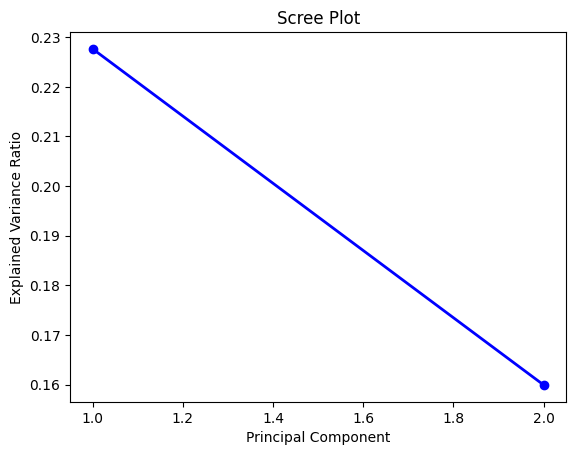

In [ ]:
# Plot the scree plot
plt.plot(range(1, len(explained_var) + 1), explained_var, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Reconstruct the dataset using the principal components
X_recon = pca.inverse_transform(X_pca)

# Calculate the reconstruction error
recon_error = ((X_scaled - X_recon) ** 2).mean()
print('Reconstruction error:', recon_error)

Reconstruction error: 0.61242877907916


In [ ]:
# Get the correlation coefficients between the original variables and the principal components
corr_matrix = pd.DataFrame(pca.components_, columns=X.columns)
print('Correlation matrix:\n', corr_matrix)

Correlation matrix:
    InvoiceNo  StockCode  Description  Quantity  UnitPrice   Country     Month  \
0  -0.568608  -0.078874    -0.025301  0.006085   0.026074 -0.003890 -0.426074   
1   0.004777   0.008234     0.001348  0.705237   0.037539 -0.023476  0.002403   

       Year   WeekDay  Month_Year      Hour   Revenue  
0 -0.393842  0.025746   -0.575392 -0.025675  0.006523  
1  0.008195  0.002719    0.005229 -0.024007  0.707039  


# KMeans Clustering

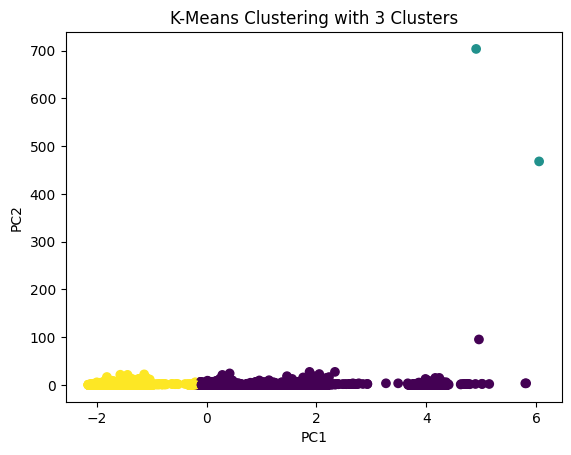

In [ ]:
# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_pca)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()

# K-Nearest Neighbors

In [ ]:
# Split the dataset into training and testing sets
y = final_data['Country']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Apply KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = knn.predict(X_test)

# Compute the accuracy score
accuracy_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score that is achieved by KNN is : {accuracy_1 * 100}")

Accuracy score that is achieved by KNN is : 87.66294931960775


In [ ]:
# Predict the target variable on the test set
y_pred = knn.predict(X_test)

# Compute the evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"The Precision score is : {precision}")
print(f"The Recall score is : {recall}")
print(f"The F1 score is : {f1}")
print(f"The Confusion matrix is :\n{cm}")

The Precision score is : 0.8367638860461188
The Recall score is : 0.8766294931960774
The F1 score is : 0.8540584149212584
The Confusion matrix is :
[[    46      0      0 ...      0    223      0]
 [     0      6      0 ...      0     62      0]
 [     0      0      0 ...      0      7      0]
 ...
 [     0      0      0 ...      0     18      0]
 [   134     42      2 ...      2 103076     11]
 [     0      0      0 ...      0     72      4]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [ ]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier with the criterion set to "gini"
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the performance on the testing set
accuracy_2 = rfc.score(X_test, y_test)
print("Accuracy that is achieved from RFC before applying PCA is : {:.2f}%".format(accuracy_2*100))

Accuracy that is achieved from RFC before applying PCA is : 99.98%


In [ ]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier with the criterion set to "gini"
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the performance on the testing set
accuracy_3 = rfc.score(X_test, y_test)
print("Accuracy that is achieved from RFC after applying PCA is : {:.2f}%".format(accuracy_3*100))

Accuracy that is achieved from RFC after applying PCA is : 89.92%
